OTL

What.

In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = np.load('../../kaggle4Data/train_and_test.npz')

In [3]:
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']

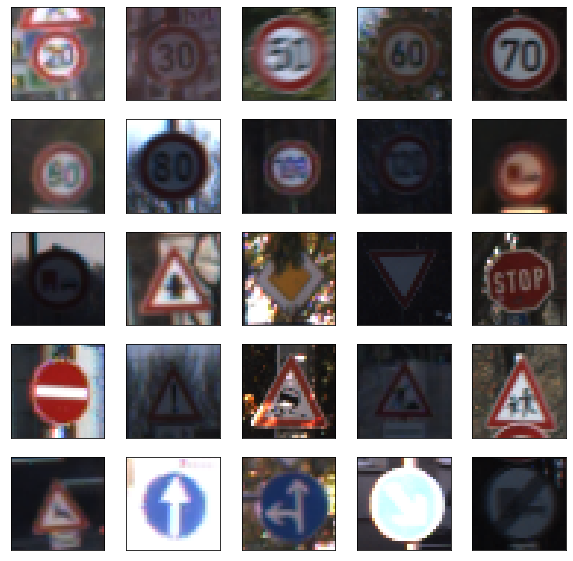

In [4]:
plt.figure(figsize=(10,10))
images = np.linspace(0, len(X_train)-1, 25)
ii = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[int(images[ii])], cmap=plt.cm.binary)
    ii += 1
plt.show()

In [5]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (39209, 32, 32, 3)
y_train shape: (39209, 43)


- So we have 39209 samples of 32 x 32 sized images that have 3 filters (r,b,g presumably)
- The target values are 43 different classes that each image can be classified as

In [6]:
# Partitioning
xTrain, xTest, yTrain, yTest = train_test_split(X_train, y_train)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(29406, 32, 32, 3) (29406, 43)
(9803, 32, 32, 3) (9803, 43)


<h2>CNN</h2>
With Keras

**one-hot encoding**: converting categorical data into vector of numbers
- which is probably why the `y_train` shape is an array of 43 values, each a classification

In [7]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [8]:
batch_size = 256 # 256
epochs = 100 # 100
num_classes = yTrain.shape[1]
num_classes

43

<h3>The model</h3>

In [9]:
numConvos = 3
convoFilters = [32, 64, 128]
filterSize = (3, 3)
poolingSize = (2, 2)
imageShape = xTrain.shape[1:]

In [10]:
testModel = Sequential()

testModel.add(Conv2D(convoFilters[0], kernel_size=filterSize, activation='linear', input_shape=imageShape, padding='same'))
testModel.add(LeakyReLU(alpha=0.1))
testModel.add(MaxPooling2D(poolingSize, padding='same'))
testModel.add(Dropout(0.25))

testModel.add(Conv2D(convoFilters[1], filterSize, activation='linear', padding='same'))
testModel.add(LeakyReLU(alpha=0.1))
testModel.add(MaxPooling2D(poolingSize, padding='same'))
testModel.add(Dropout(0.25))

testModel.add(Conv2D(convoFilters[2], filterSize, activation='linear', padding='same'))
testModel.add(LeakyReLU(alpha=0.1))
testModel.add(MaxPooling2D(poolingSize, padding='same'))
testModel.add(Dropout(0.4))

testModel.add(Flatten())
testModel.add(Dense(convoFilters[2], activation='linear'))
testModel.add(LeakyReLU(alpha=0.1))
testModel.add(Dropout(0.3))

testModel.add(Dense(num_classes, activation='softmax'))

In [11]:
testLoss = keras.losses.categorical_crossentropy
testOptimizer = keras.optimizers.Adam()
testModel.compile(loss=testLoss, optimizer= testOptimizer, metrics=['accuracy'])

In [12]:
testModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

<h3>The training</h3>

In [13]:
testTrain = testModel.fit(xTrain, yTrain, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(xTest, yTest))

Train on 29406 samples, validate on 9803 samples
Epoch 1/100
29406/29406 [==============================] - 17s 570us/step - loss: 5.2802 - accuracy: 0.1080 - val_loss: 3.0008 - val_accuracy: 0.2220
Epoch 2/100
29406/29406 [==============================] - 17s 572us/step - loss: 2.5443 - accuracy: 0.3197 - val_loss: 1.7028 - val_accuracy: 0.5146
Epoch 3/100
29406/29406 [==============================] - 17s 564us/step - loss: 1.7175 - accuracy: 0.4960 - val_loss: 0.9681 - val_accuracy: 0.7057
Epoch 4/100
29406/29406 [==============================] - 16s 549us/step - loss: 1.2154 - accuracy: 0.6215 - val_loss: 0.5955 - val_accuracy: 0.8050
Epoch 5/100
29406/29406 [==============================] - 16s 556us/step - loss: 0.9118 - accuracy: 0.7121 - val_loss: 0.3963 - val_accuracy: 0.8716
Epoch 6/100
29406/29406 [==============================] - 17s 561us/step - loss: 0.6844 - accuracy: 0.7818 - val_loss: 0.2446 - val_accuracy: 0.9195
Epoch 7/100
29406/29406 [==========================

Epoch 55/100
29406/29406 [==============================] - 17s 568us/step - loss: 0.0918 - accuracy: 0.9768 - val_loss: 0.0189 - val_accuracy: 0.9956
Epoch 56/100
29406/29406 [==============================] - 16s 550us/step - loss: 0.1137 - accuracy: 0.9709 - val_loss: 0.0175 - val_accuracy: 0.9959
Epoch 57/100
29406/29406 [==============================] - 16s 554us/step - loss: 0.0979 - accuracy: 0.9776 - val_loss: 0.0140 - val_accuracy: 0.9964
Epoch 58/100
29406/29406 [==============================] - 17s 565us/step - loss: 0.1093 - accuracy: 0.9740 - val_loss: 0.0162 - val_accuracy: 0.9964
Epoch 59/100
29406/29406 [==============================] - 17s 561us/step - loss: 0.0973 - accuracy: 0.9750 - val_loss: 0.0151 - val_accuracy: 0.9966
Epoch 60/100
29406/29406 [==============================] - 16s 559us/step - loss: 0.0872 - accuracy: 0.9778 - val_loss: 0.0151 - val_accuracy: 0.9959
Epoch 61/100
29406/29406 [==============================] - 16s 559us/step - loss: 0.1004 - ac

In [14]:
testEval = testModel.evaluate(xTest, yTest, verbose=0)
print('Test loss:', testEval[0])
print('Test accuracy:', testEval[1])

Test loss: 0.017438467993499317
Test accuracy: 0.996735692024231


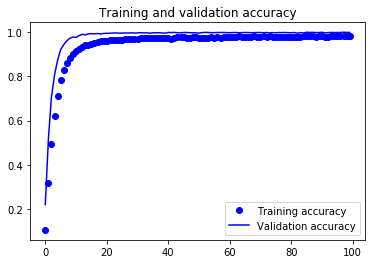

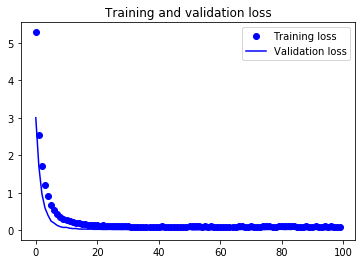

In [15]:
accuracy = testTrain.history['accuracy']
valAccuracy = testTrain.history['val_accuracy']
loss = testTrain.history['loss']
valLoss = testTrain.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, valAccuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, valLoss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

<h3>The predictions</h3>

In [16]:
predictions = testModel.predict(X_test)
predictions

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.06510540e-05, 1.13052572e-03, 1.63394841e-04, ...,
        9.49073620e-09, 1.35045685e-02, 1.49261067e-03],
       [1.47696043e-17, 3.93115818e-11, 4.51069607e-12, ...,
        4.29995145e-12, 4.42765276e-28, 6.80521728e-15],
       [0.00000000e+00, 1.11219121e-35, 6.68382046e-28, ...,
        0.00000000e+00, 1.51552335e-36, 8.90127078e-25]], dtype=float32)

In [17]:
predSubmission = pd.DataFrame(predictions.astype('int'))

columns = pd.read_csv('../../kaggle4Data/samples_onehot.csv')
columns = columns.columns
print(columns[1:])

predSubmission.columns = columns[1:]
predSubmission.index.name = 'id'

predSubmission

Index(['oh_0', 'oh_1', 'oh_2', 'oh_3', 'oh_4', 'oh_5', 'oh_6', 'oh_7', 'oh_8',
       'oh_9', 'oh_10', 'oh_11', 'oh_12', 'oh_13', 'oh_14', 'oh_15', 'oh_16',
       'oh_17', 'oh_18', 'oh_19', 'oh_20', 'oh_21', 'oh_22', 'oh_23', 'oh_24',
       'oh_25', 'oh_26', 'oh_27', 'oh_28', 'oh_29', 'oh_30', 'oh_31', 'oh_32',
       'oh_33', 'oh_34', 'oh_35', 'oh_36', 'oh_37', 'oh_38', 'oh_39', 'oh_40',
       'oh_41', 'oh_42'],
      dtype='object')


,oh_0,oh_1,oh_2,oh_3,oh_4,oh_5,oh_6,oh_7,oh_8,oh_9,...,oh_33,oh_34,oh_35,oh_36,oh_37,oh_38,oh_39,oh_40,oh_41,oh_42
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12626,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
predSubmission.to_csv('LL_submission_02.csv')